# Test of neural network
By: Magnus Kvåle Helliesen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [2]:
nn = NeuralNetwork(100, 25, 2, 2)

## Testing if it learns from only updating the output layer

In [3]:
# Generating a random input array
array1 = np.linspace(-10, 10, 100)
array2 = np.linspace(10, -10, 100)

In [4]:
# Without training the neural network does not know how that maps to an output
nn.predict(array1)

array([0.50336922, 0.49663078])

In [5]:
nn.predict(array2)

array([0.50334562, 0.49665438])

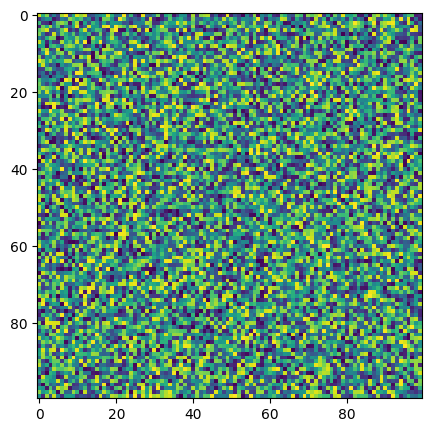

In [6]:
# Heatmap of weights between hidden layer before training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1])
plt.show()

In [19]:
# Making two types of data with some noise
sigmoid = lambda x: np.exp(x)/np.exp(x).sum()

type1_data = tuple(((sigmoid(array1+np.random.normal(size=100)/5), np.array([1, 0])) for _ in range(250)))
type2_data = tuple(((sigmoid(array2+np.random.normal(size=100)/5), np.array([0, 1])) for _ in range(250)))
data = (*type1_data, *type2_data)

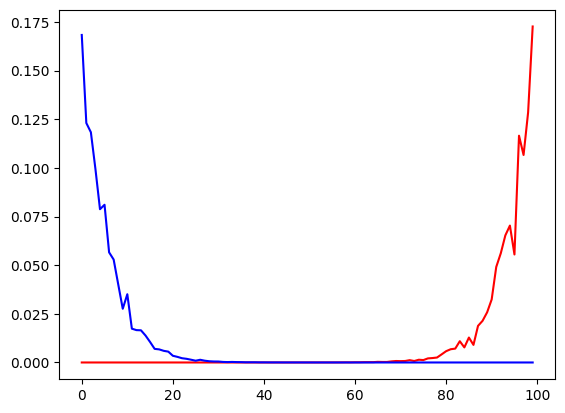

In [20]:
# How the two data types look
plt.figure()
plt.plot(type1_data[0][0], 'r')
plt.plot(type2_data[0][0], 'b')
plt.show()

In [14]:
# Let's train it
for _ in range(50):
    nn.train(data)

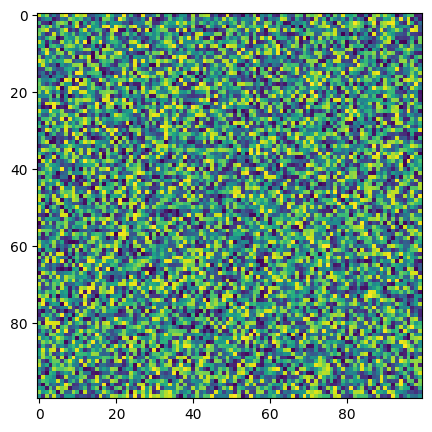

In [15]:
# Heatmap of weights between hidden layer after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1])
plt.show()

In [16]:
# It already shows improvement, but only slightly...
nn.predict(array1)

array([0.50049077, 0.49950923])

In [17]:
nn.predict(array2)

array([0.50020728, 0.49979272])

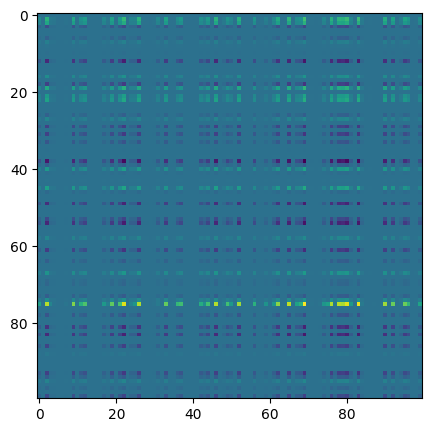

In [18]:
# Heatmap of difference between weights between hidden layer before and after training
plt.figure(figsize=(5, 5))
plt.imshow(nn.weights[1]-nn._weights0[1])
plt.show()